In [2]:

import numpy as np # linear algebra
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"C:\Users\cheta\OneDrive\Desktop\tsunami\Disaster-Prediction-System\woodpecker\earthquake_data.csv")

In [7]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [9]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [10]:
df.isnull().sum()/df.shape[0]*100

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [11]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [12]:
df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [13]:
#Converting date_time to year and month
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [14]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Solomon Islands,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,NaN,2022,11
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Fiji,2022,11
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,NaN,2022,11
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,2022,11


In [15]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
country      298
Year           0
Month          0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

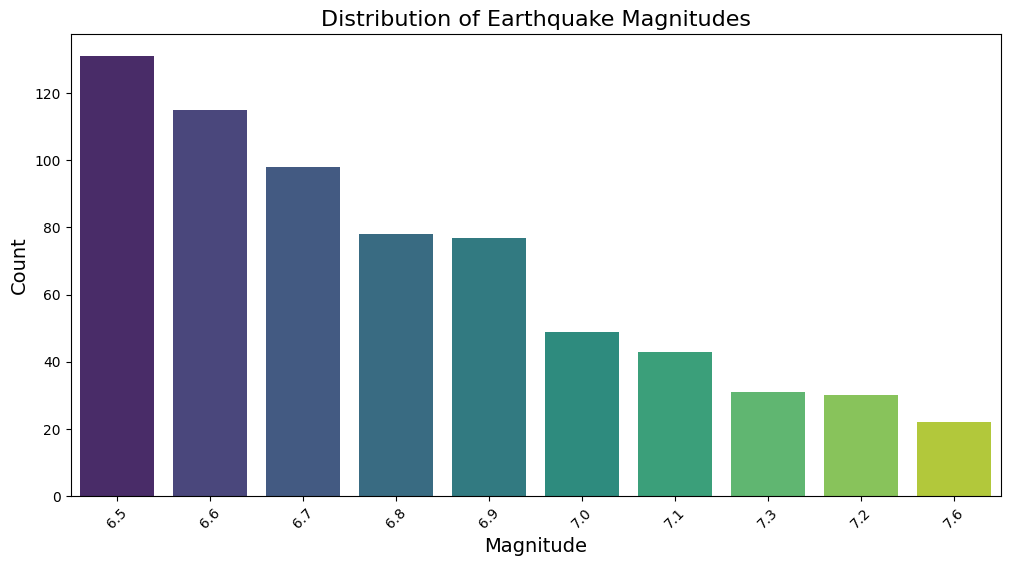

In [19]:
Morder=df['magnitude'].value_counts().head(10).index #selecting top 10 most frequent magnitudes

plt.figure(figsize=(12, 6))
sns.countplot(x='magnitude', data=df, palette='viridis',order=Morder)
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()
#Most earthquakes tend to be around 6.5 to 6.7 on the scale

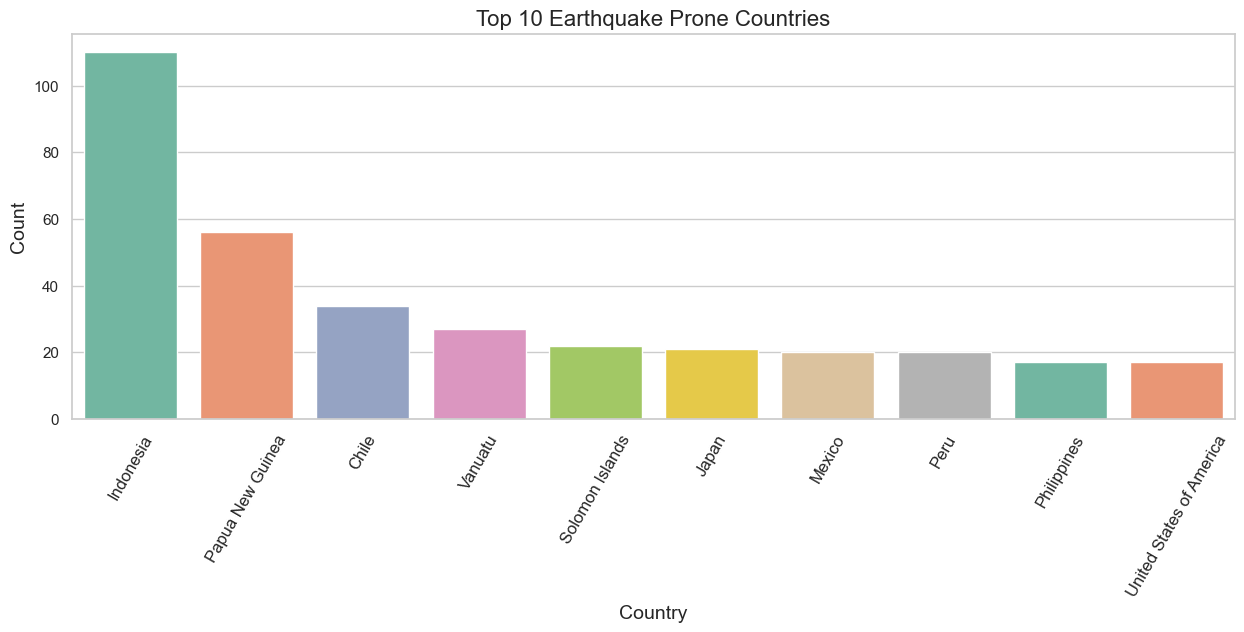

In [20]:
o = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")
sns.countplot(x='country', data=df, order=o, palette='Set2')
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Earthquake Prone Countries', fontsize=16)
plt.show()


#Indonesia faced the highest number of earthquakes.

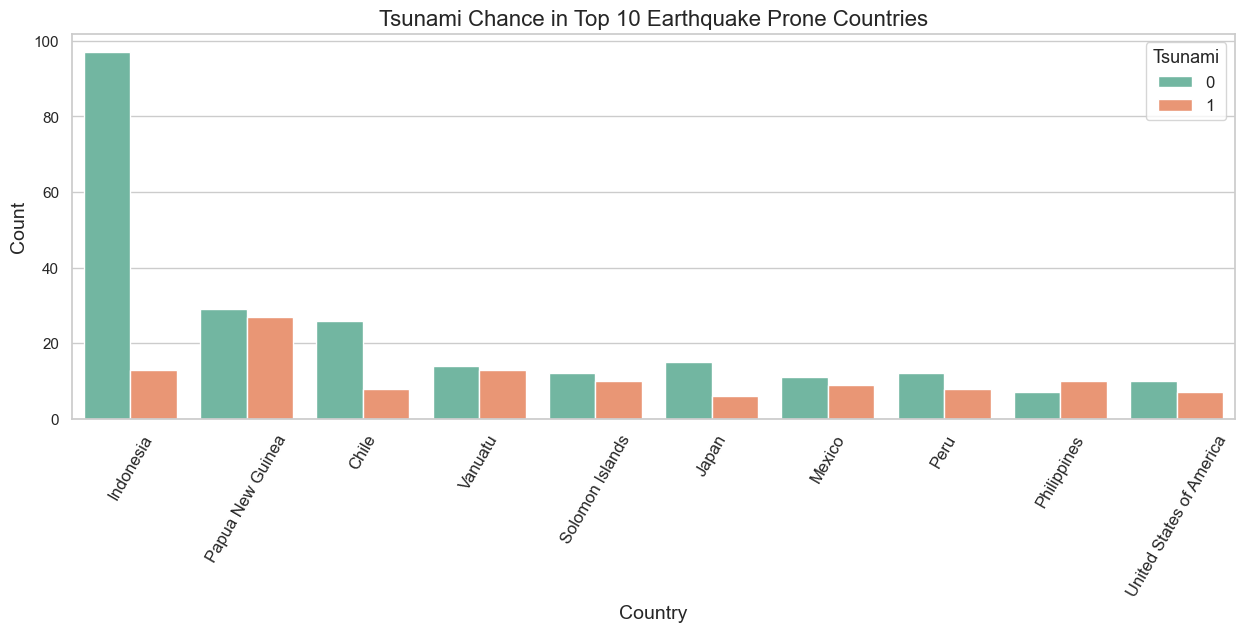

In [21]:
o = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")

sns.countplot(x='country', data=df, order=o, hue='tsunami', palette='Set2')

plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Tsunami Chance in Top 10 Earthquake Prone Countries', fontsize=16)
plt.legend(title='Tsunami', title_fontsize='13', fontsize='12')

In [22]:
country_count = df.groupby('country')['tsunami'].value_counts().unstack(fill_value=0)
country_count.columns = ['No Tsunami', 'Tsunami']
country_count['Earthquick']=country_count['No Tsunami']+country_count['Tsunami']
country_count['Tsunami Probability']=round((country_count['Tsunami']/country_count['Earthquick'])*100,2)

# Filter out countries with a minimum number of earthquakes
threshold = 5
filtered_country=country_count[country_count['Earthquick']>threshold]
top_10_tsunami_countries=filtered_country.sort_values(by='Tsunami Probability',ascending=False).head(15)
print(top_10_tsunami_countries[['Tsunami Probability', 'Earthquick']])

                          Tsunami Probability  Earthquick
country                                                  
Fiji                                    88.89           9
Ecuador                                 66.67           6
Philippines                             58.82          17
New Zealand                             55.56           9
Taiwan                                  50.00           6
Papua New Guinea                        48.21          56
Vanuatu                                 48.15          27
Solomon Islands                         45.45          22
Mexico                                  45.00          20
United States of America                41.18          17
Peru                                    40.00          20
Russia                                  33.33          15
Japan                                   28.57          21
Chile                                   23.53          34
Indonesia                               11.82         110


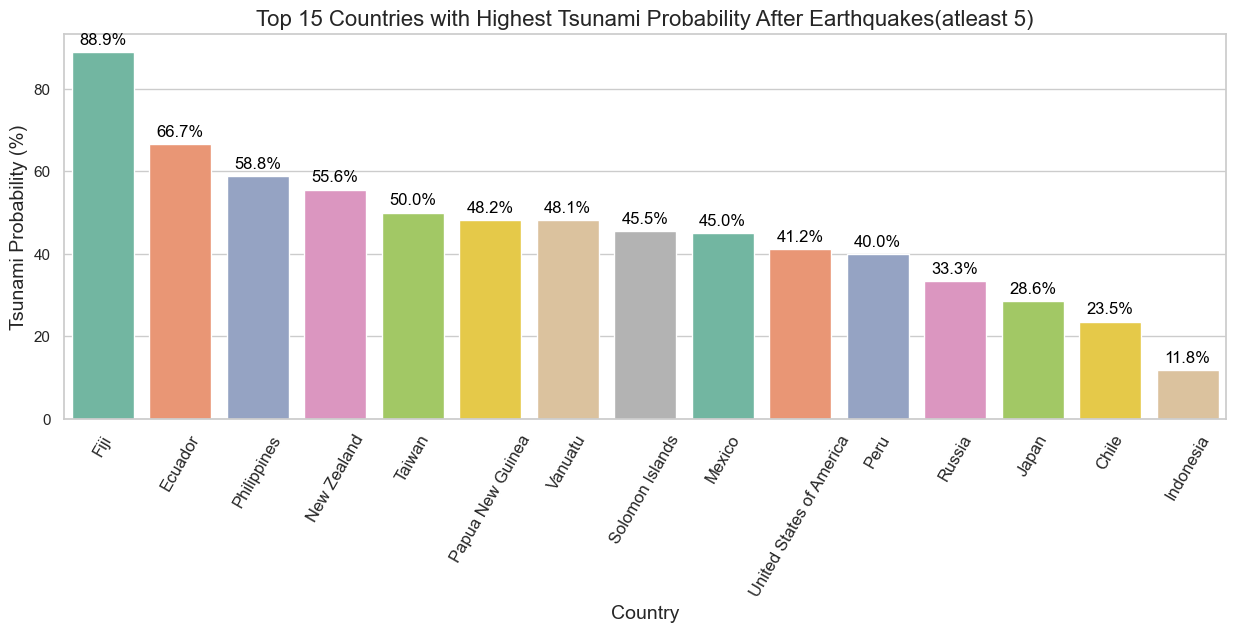

In [23]:
plt.figure(figsize=(15, 5))
ax=sns.barplot(x=top_10_tsunami_countries.index, y=top_10_tsunami_countries['Tsunami Probability'], palette='Set2')
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Tsunami Probability (%)', fontsize=14)
plt.title('Top 15 Countries with Highest Tsunami Probability After Earthquakes(atleast 5)', fontsize=16)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()+3),
                ha='center', va='center',fontsize=12, color='black')

In [24]:
pd.crosstab(df['magnitude'], df['tsunami']).head()

tsunami,0,1
magnitude,,
6.5,81,50
6.6,72,43
6.7,66,32
6.8,46,32
6.9,40,37


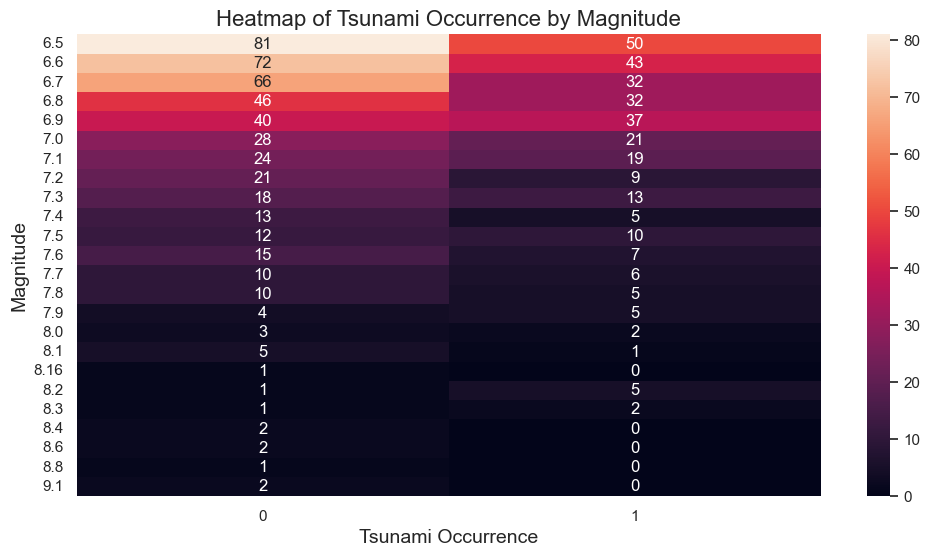

In [25]:
heatmap_data = pd.crosstab(df['magnitude'], df['tsunami'])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Tsunami Occurrence', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Heatmap of Tsunami Occurrence by Magnitude', fontsize=16)
plt.show()

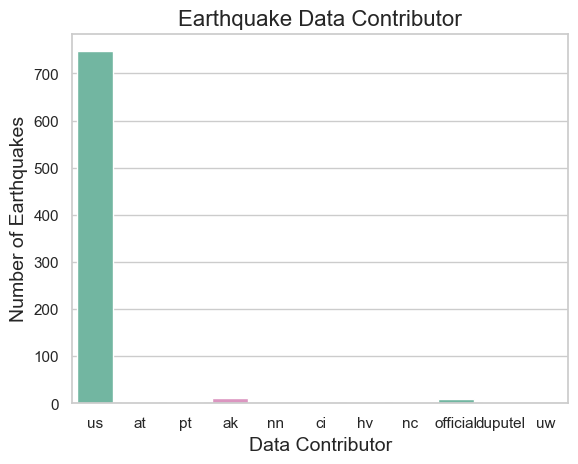

In [26]:
sns.countplot(x='net',data=df,palette='Set2')
plt.title('Earthquake Data Contributor', fontsize=16)
plt.xlabel('Data Contributor', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
#The US is a major contributor of earthquake data
plt.show()


Text(0, 0.5, 'Count')

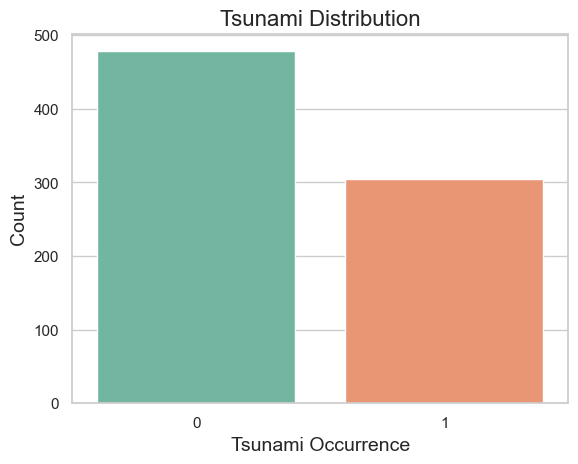

In [27]:
sns.countplot(x='tsunami', data=df, palette='Set2')

plt.title('Tsunami Distribution', fontsize=16)
plt.xlabel('Tsunami Occurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)

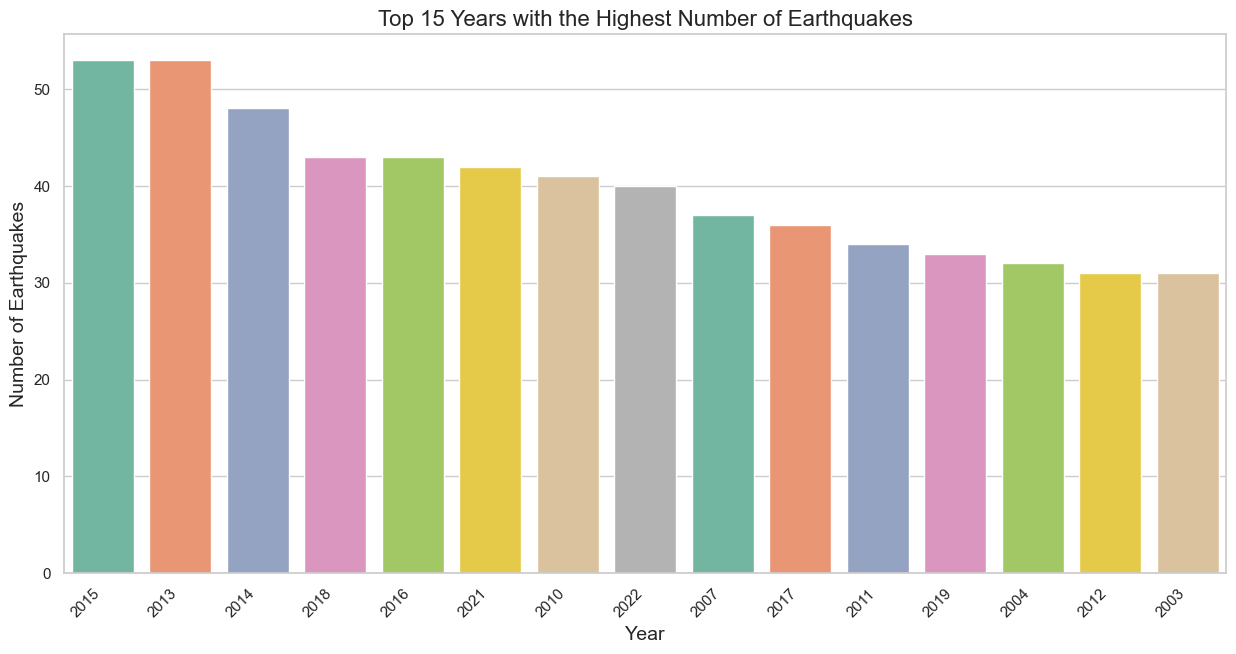

In [28]:
plt.figure(figsize=(15, 7))

top_years = df['Year'].value_counts().head(15).index
sns.countplot(x='Year', data=df, order=top_years, palette='Set2')
plt.title('Top 15 Years with the Highest Number of Earthquakes', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()
#In 2015 and 2013, the world experienced the highest number of earthquakes. 

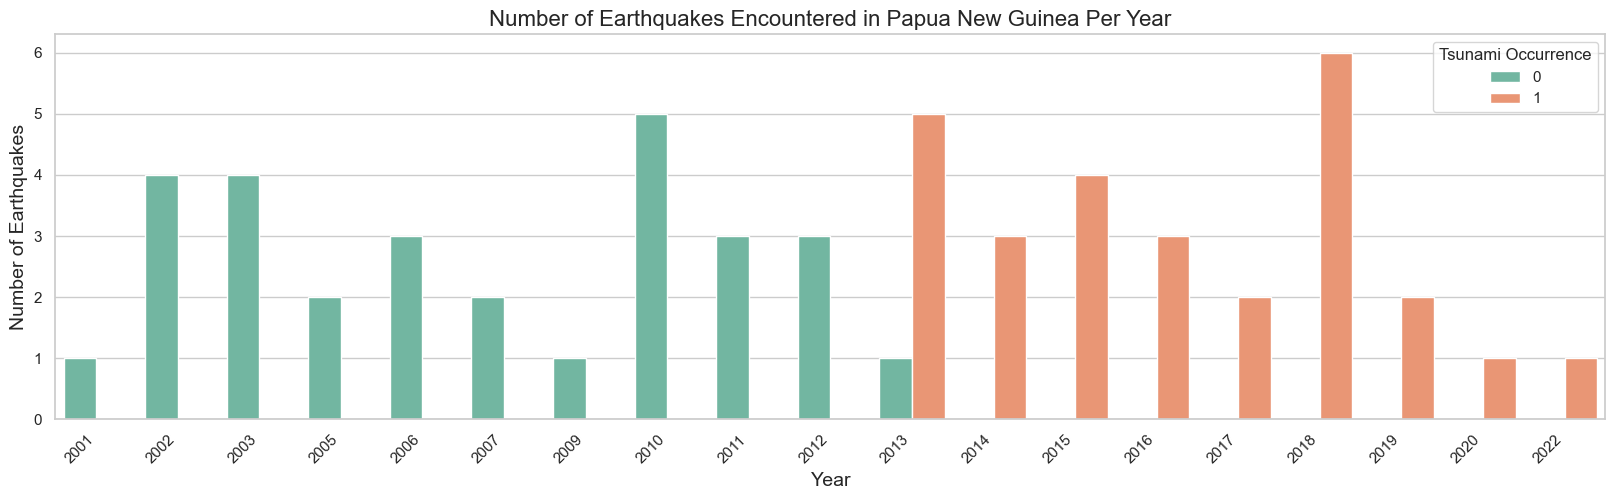

In [29]:
Papua=df[df['country']=='Papua New Guinea']

plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Papua, hue='tsunami', palette='Set2')

plt.title('Number of Earthquakes Encountered in Papua New Guinea Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Tsunami Occurrence')
#Papua New Guinea experiences at least one earthquake per year but before 2013 Papua New Guinea never experienced tsunami after earthquick 

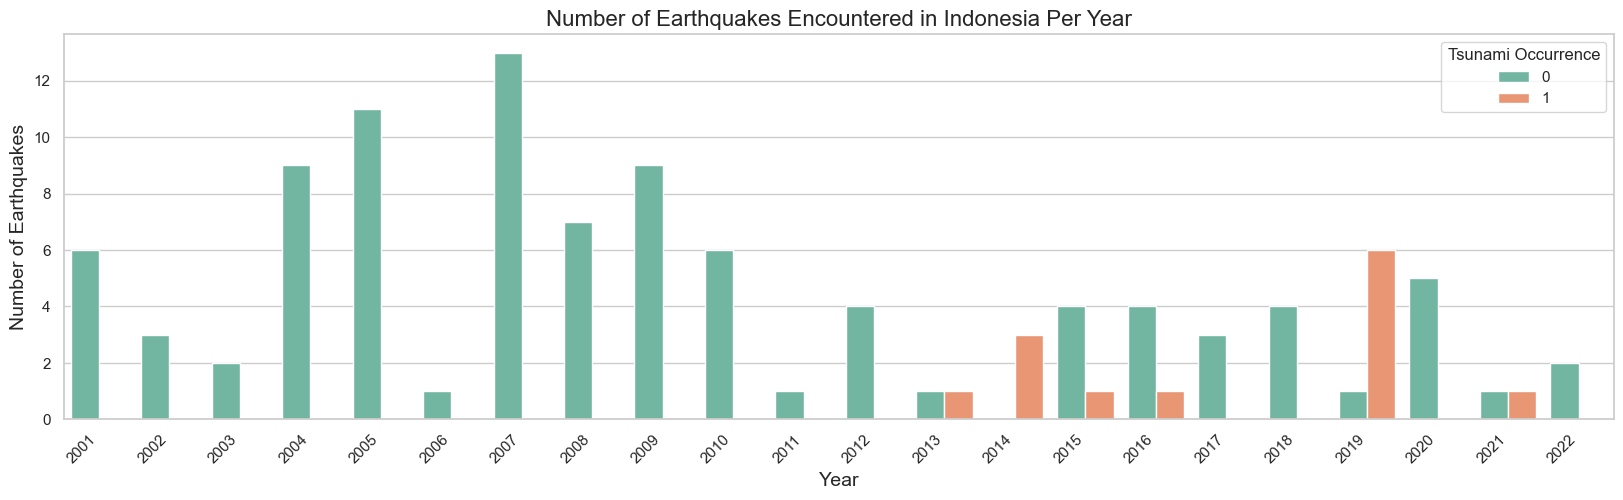

In [30]:
Indo = df[df['country'] == 'Indonesia']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Indo, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Indonesia Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()
#Indonesia encountered 13 earthquic in the year 2007

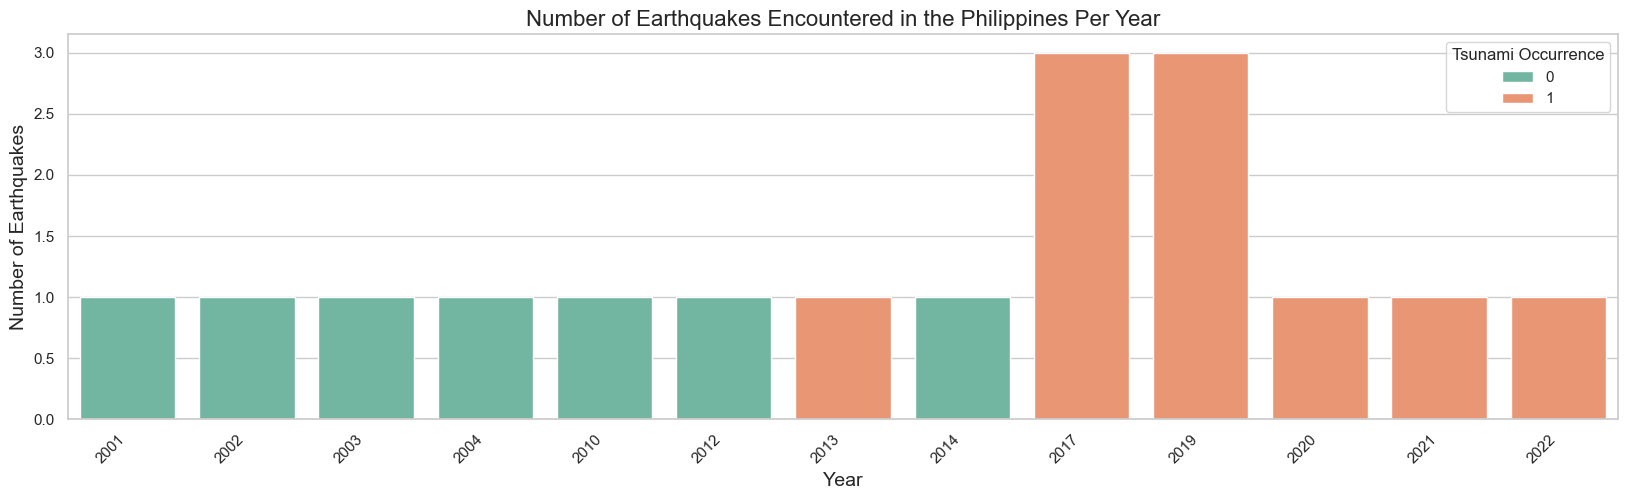

In [31]:
Phi = df[df['country'] == 'Philippines']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Phi, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in the Philippines Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

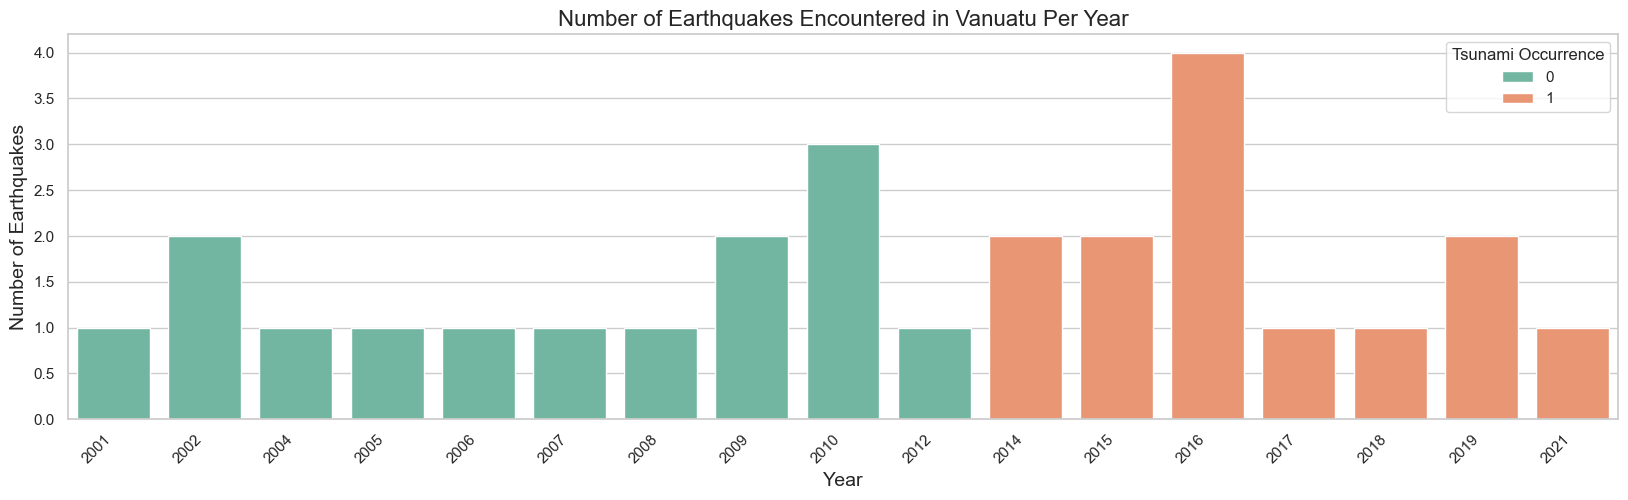

In [32]:
Van = df[df['country'] == 'Vanuatu']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Van, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Vanuatu Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

In [33]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Solomon Islands,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,NaN,2022,11
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,Fiji,2022,11
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,NaN,2022,11
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,2022,11


In [34]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude


In [35]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,us,mww
...,...,...
777,us,mwc
778,ak,mw
779,us,mwb
780,us,mwc


In [36]:
obj.nunique()

net        11
magType     9
dtype: int64

In [37]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,7.0,8,7,1,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,8
1,6.9,4,4,0,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,8
2,7.0,3,3,1,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,8
3,7.3,5,5,1,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,8
4,6.6,0,2,1,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,8


<Axes: >

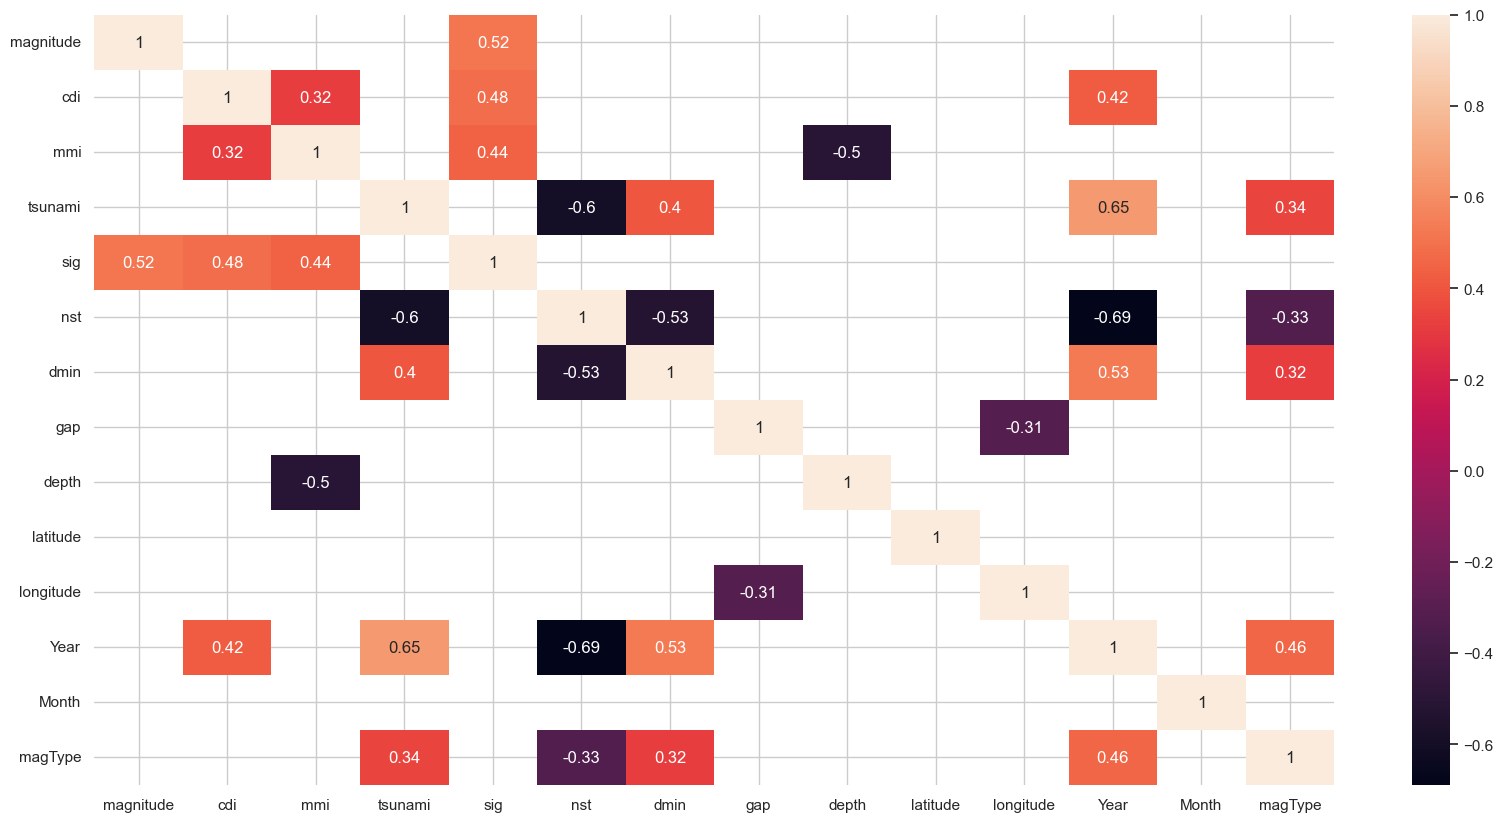

In [38]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [39]:
pip install --upgrade imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [42]:
sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

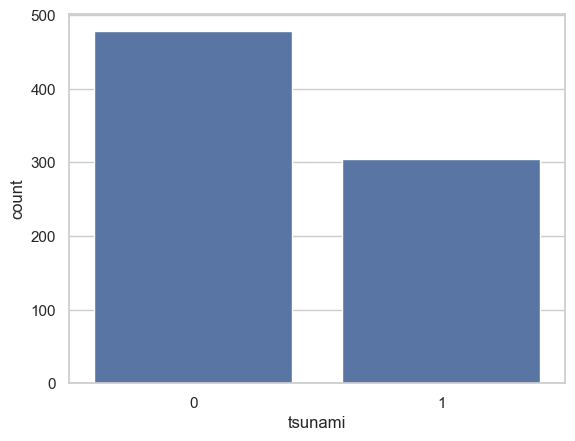

In [43]:
sns.countplot(x=y,data=df)

In [44]:
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [45]:
x_train.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,1.704459,1.472971,-1.343693,0.148611,-0.920899,3.004999,-0.414670,-0.480236,-0.982806,1.008965,1.430546,-1.301891,0.589322
1,0.581442,-1.368018,0.708588,-0.223760,1.206862,-0.597892,0.035565,-0.480236,1.171001,0.244924,-0.702161,-1.016635,-0.378850
2,-0.092369,0.841640,0.024494,0.151714,-0.920899,0.583229,0.411449,-0.239692,1.271404,0.755841,1.430546,-0.446123,0.589322
3,-0.766179,1.157305,-0.659599,-0.552688,-0.920899,0.295051,0.783203,-0.484245,0.826549,-1.382833,0.118111,0.980157,0.589322
4,-0.990783,0.841640,0.708588,1.520178,-0.716922,-0.452450,8.053055,-0.343658,1.360183,-1.504804,-0.374052,-1.587147,-2.315193


In [46]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [47]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)  
    print("Model: " , name)
    print("------------------------------")    
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        91
           1       0.86      0.86      0.86        66

    accuracy                           0.89       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.89      0.89      0.89       157

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        91
           1       0.93      0.82      0.87        66

    accuracy                           0.90       157
   macro avg       0.90      0.89      0.89       157
weighted avg       0.90      0.90      0.90       157

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0

In [48]:
# Model:  xg
model=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
0.939271051529116


              precision    recall  f1-score   support

           0       0.90      0.97      0.93        91
           1       0.95      0.85      0.90        66

    accuracy                           0.92       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.92      0.92       157

Axes(0.125,0.11;0.62x0.77)


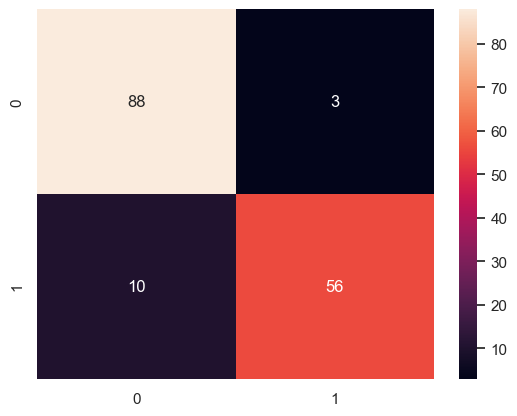

In [49]:
p = grid.predict(x_test)  
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model: RandomForest
model=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

p = grid.predict(x_test)  
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load earthquake data
df = pd.read_csv(r"C:\Users\cheta\OneDrive\Desktop\tsunami\Disaster-Prediction-System\woodpecker\earthquake_data.csv")

# Select relevant features for tsunami prediction
features = ['magnitude', 'depth', 'latitude', 'longitude']
X = df[features]

# Target variable (tsunami occurrence)
y = df['tsunami']

# Handle missing values
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(model, 'tsunami_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler re-trained and saved.")


Model and scaler re-trained and saved.


In [2]:





# Prediction function
def predict_tsunami(magnitude, depth, latitude, longitude):
    """
    Estimates the probability of a tsunami occurring and its potential severity
    based on the given magnitude, depth, latitude, and longitude.

    **Note:** This is a simplified model and may not be accurate for real-world predictions.
        For reliable tsunami warnings, consult official sources.

    Args:
        magnitude (float): Earthquake magnitude.
        depth (float): Depth of the earthquake epicenter.
        latitude (float): Latitude of the earthquake epicenter.
        longitude (float): Longitude of the earthquake epicenter.

    Returns:
        tuple: A tuple containing two elements:
            - tsunami_probability (float): The estimated probability of a tsunami occurring (0.0 to 1.0).
            - tsunami_severity (str): A textual indication of potential tsunami severity ("Low", "Moderate", "High").
    """
    # Load the pre-trained model and scaler
    model = joblib.load('tsunami_prediction_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Prepare input data
    input_data = [[magnitude, depth, latitude, longitude]]
    scaled_features = scaler.transform(input_data)

    # Make prediction using the trained model
    tsunami_prediction = model.predict_proba(scaled_features)[0][1]  # Probability of tsunami class

    # Estimate tsunami severity based on the probability (replace with your severity criteria)
    if tsunami_prediction > 0.9:
        tsunami_severity = "High"
    elif tsunami_prediction > 0.7:
        tsunami_severity = "Moderate"
    else:
        tsunami_severity = "Low"

    return tsunami_prediction, tsunami_severity


# Get user input
try:
    magnitude = float(input("Enter earthquake magnitude: "))
    depth = float(input("Enter earthquake depth: "))
    latitude = float(input("Enter earthquake latitude: "))
    longitude = float(input("Enter earthquake longitude: "))
except ValueError:
    print("Invalid input. Please enter numerical values for magnitude, depth, latitude, and longitude.")
    exit()

# Make prediction and display results
tsunami_probability, tsunami_severity = predict_tsunami(magnitude, depth, latitude, longitude)

print("\nEstimated Tsunami Probability:", tsunami_probability)
print("Estimated Tsunami Severity:", tsunami_severity)



Estimated Tsunami Probability: 0.32
Estimated Tsunami Severity: Low


c:\Users\cheta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
